In [1]:
import load_data 
import network 
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
from torchvision import transforms, utils
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

In [2]:
path = './data/'
filename = 'dataset_batch_3.mat'
train_input_dataset,train_output_dataset = load_data.load_dataset(path,filename)
print(train_input_dataset.shape,train_output_dataset.shape)

(1189, 200, 128, 128) (1189, 128, 128)


In [3]:
# path = './data/'
# filename = 'dataset_batch_2.mat'
# test_input_dataset,test_output_dataset = load_data.load_dataset(path,filename)
# print(test_input_dataset.shape,test_output_dataset.shape)
# testing_dataset = load_data.DeconvolutionDataset(test_input_dataset,test_output_dataset,transform=load_data.ToTensor())

(528, 200, 128, 128) (528, 128, 128)


In [4]:
training_dataset = load_data.DeconvolutionDataset(train_input_dataset,train_output_dataset,
                                                  transform=transforms.Compose([load_data.ImageSelect(50),
                                                                              load_data.ToTensor()]))
dataloader = DataLoader(training_dataset, batch_size=80,shuffle=True, num_workers=4)

In [7]:
device = torch.device("cuda:0")
model = network.FullyConvNet_50()
# model = nn.DataParallel(model)
# model.cuda()
model.to(device)

# criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss()
# optimizer = optim.SGD(model.parameters(), lr=1e-9)
optimizer = optim.Adam(model.parameters(), lr=1e-6)

In [8]:
num_epochs = 10000
for epoch in range(num_epochs):
    for batch_idx, sample in enumerate(dataloader):
        inputs,target = sample['input'].to(device),sample['output'].to(device)
#         inputs,target = sample['input'].cuda(),sample['output'].cuda()
        
#         inputs = Variable(x_train).cuda()
#         target = Variable(y_train).cuda()

        # forward
        out = model(inputs)
        loss = criterion(out, target)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch < 100:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))
    elif (epoch+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[1/10000], loss: 0.033901
Epoch[2/10000], loss: 0.021665
Epoch[3/10000], loss: 0.019117
Epoch[4/10000], loss: 0.019468
Epoch[5/10000], loss: 0.016251
Epoch[6/10000], loss: 0.016184
Epoch[7/10000], loss: 0.013889
Epoch[8/10000], loss: 0.013327
Epoch[9/10000], loss: 0.013244
Epoch[10/10000], loss: 0.012829
Epoch[11/10000], loss: 0.012549
Epoch[12/10000], loss: 0.012762
Epoch[13/10000], loss: 0.011868
Epoch[14/10000], loss: 0.010772
Epoch[15/10000], loss: 0.009934
Epoch[16/10000], loss: 0.009521
Epoch[17/10000], loss: 0.009529
Epoch[18/10000], loss: 0.008975
Epoch[19/10000], loss: 0.008442
Epoch[20/10000], loss: 0.008983
Epoch[21/10000], loss: 0.008172
Epoch[22/10000], loss: 0.007920
Epoch[23/10000], loss: 0.008165
Epoch[24/10000], loss: 0.007857
Epoch[25/10000], loss: 0.007889
Epoch[26/10000], loss: 0.008124
Epoch[27/10000], loss: 0.008083
Epoch[28/10000], loss: 0.007436
Epoch[29/10000], loss: 0.007826
Epoch[30/10000], loss: 0.007478
Epoch[31/10000], loss: 0.007133
Epoch[32/10000], 

/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[200/10000], loss: 0.001931
Epoch[300/10000], loss: 0.001359
Epoch[400/10000], loss: 0.001135
Epoch[500/10000], loss: 0.000806
Epoch[600/10000], loss: 0.000668
Epoch[700/10000], loss: 0.000684
Epoch[800/10000], loss: 0.000655
Epoch[900/10000], loss: 0.000512
Epoch[1000/10000], loss: 0.000515
Epoch[1100/10000], loss: 0.000586
Epoch[1200/10000], loss: 0.000440
Epoch[1300/10000], loss: 0.000481
Epoch[1400/10000], loss: 0.000513
Epoch[1500/10000], loss: 0.000537
Epoch[1600/10000], loss: 0.000575
Epoch[1700/10000], loss: 0.000464
Epoch[1800/10000], loss: 0.000450
Epoch[1900/10000], loss: 0.000420
Epoch[2000/10000], loss: 0.000545
Epoch[2100/10000], loss: 0.000433
Epoch[2200/10000], loss: 0.000515
Epoch[2300/10000], loss: 0.000477
Epoch[2400/10000], loss: 0.000457
Epoch[2500/10000], loss: 0.000419
Epoch[2600/10000], loss: 0.000371
Epoch[2700/10000], loss: 0.000341
Epoch[2800/10000], loss: 0.000384
Epoch[2900/10000], loss: 0.000348
Epoch[3000/10000], loss: 0.000390
Epoch[3100/10000], los

In [9]:
model.eval()

FullyConvNet_50(
  (conv1): Conv2d(50, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(100, 50, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv3): Conv2d(50, 10, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv4): Conv2d(10, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)

In [ ]:
# print(len(training_dataset),len(testing_dataset))
# print(training_dataset)

In [ ]:
# train_data = np.asarray(np.transpose(train_input_dataset[:100,:,:,:],(0,1,2,3)),dtype=np.float32)
# train_data = torch.from_numpy(train_data)
# predict = model(train_data.to(device))
# predict_train = predict.data.cpu().numpy()

In [ ]:
# print(predict_train.shape)

In [ ]:
# plt.imshow(predict_train[20,0,:,:])

In [ ]:
# plt.imshow(train_output_dataset[20,:,:])

In [ ]:
# plt.imshow(train_input_dataset[20,190,:,:])

In [10]:
path = './data/'
filename = 'dataset_test.mat'
test_input_dataset,test_output_dataset = load_data.load_dataset(path,filename)

In [11]:
test_data = np.asarray(np.transpose(test_input_dataset[:4,:50,:,:],(0,1,2,3)),dtype=np.float32)
test_data = torch.from_numpy(test_data)
predict = model(test_data.to(device))
predict_test = predict.data.cpu().numpy()
print(predict_test.shape)

(4, 1, 128, 128)


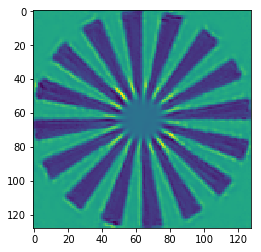

In [41]:
plt.imshow(predict_test[3,0,:,:])

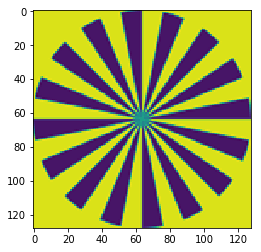

In [42]:
plt.imshow(test_output_dataset[3,:,:])

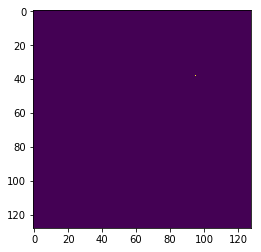

In [44]:
plt.imshow(test_input_dataset[3,9,:,:])